## Heart Disease Prediction:

### $Domain Background$ : Overview

#### Heart disease is the leading cause of death for people of most racial and ethnic groups in the United States, including African American, American Indian, Alaska Native, Hispanic, and white men. For women from the Pacific Islands and Asian American, American Indian, Alaska Native, and Hispanic women, heart disease is second only to cancer. 

#### *1 One person dies every 37 seconds just in the United States alone from cardiovascular disease.
#### *2 About 647,000 Americans die from heart disease each year—that's 1 in every 4 deaths.
#### *3 Heart disease costs the United States about 219 billion Dollor each year from 2014 to 2015. This includes the cost of health care services, medicines, and lost productivity due to death.

## 1-  Problem Statements :-

#### * 1- Complete analysis of Heart Disease UCI dataset both visually and statistically to obtain critical observations which can be used for inference.
#### * 2- To predict whether a person has a heart disease or not based on the various biological and physical parameters of the body
#### * 3- To make a model having high accuracy and precision and can predict the results with greater confidence.
#### * 4- Make these predictions accessible to users and patients anywhere, anytime so that they can get complete picture of their Health

## 2- Collecting Data

#### The data used for training and testing is the Heart Disease UCI downloaded from Kaggle.
#### This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient.

In [2]:
#### Importing Libraries ####

# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
%matplotlib inline

from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold, cross_val_score,GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

In [9]:
### read the dataset and show the top 5 row of the dataset

df_HD = pd.read_csv(r"C:/Users/HP/Desktop/dataset/Heart_Disease.txt", sep="\t")
df_HD.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
## check the last 5 Row of the dataset
df_HD.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [11]:
## let's check the basic info of the dataset , 

df_HD.info()

## here we can check that (302 row and 14 columns) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
df_HD.shape

(303, 14)

In [15]:
## let's check the basic statistics of the dataset 

df_HD.describe()

## here we can see that maximum age is 77 and the avg = 54

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
### check the missing value of the dataset column wise or total

print(" NaN value in the data set column wise :- \n " )
print(df_HD.isnull().sum())
print()
print(" Total NaN value in the data set  :- \n " )
df_HD.isnull().sum().sum()


## Here we find that no there in no missing value present in the data set

 NaN value in the data set column wise :- 
 
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

 Total NaN value in the data set  :- 
 


0

In [17]:
### Check duplicate rows #########

df_HD[df_HD.duplicated(keep='first')].shape

(1, 14)

In [19]:
Check Column Values

temp = []
for col in df_HD.columns:
    if len(df_HD[col].unique()) == 1:
        temp.append(col)
        df_HD.drop(col,inplace=True,axis=1)

In [20]:
df_HD.shape

(303, 14)

In [21]:
temp

[]

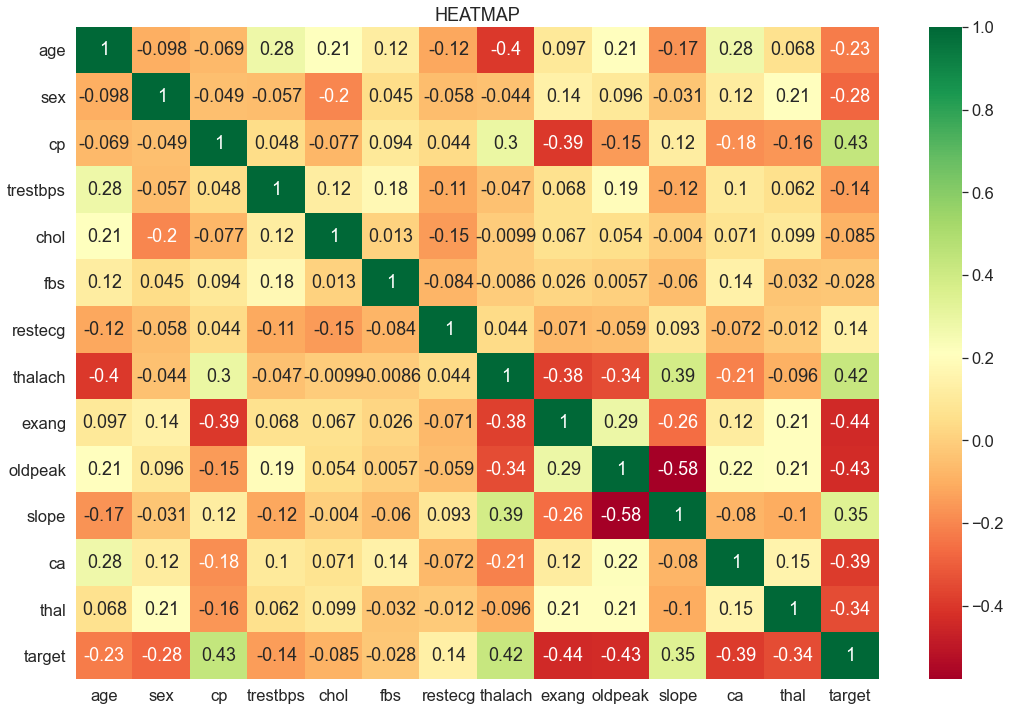

In [45]:
cor=df_HD.corr()
top_corr_feature=cor.index
plt.figure(figsize=(18,10))
sns.heatmap(df_HD[top_corr_feature].corr(),annot=True,cmap="RdYlGn")
plt.title("HEATMAP")
plt.show()

In [23]:
df_HD.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [25]:
categorical_values = []
for column in df_HD.columns:
    print('======================================================')
    print(f"{column} : {df_HD[column].unique()}")
    if len(df_HD[column].unique()) <= 10:
        categorical_values.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

In [26]:
categorical_values

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

### Exploratory Data Visualization


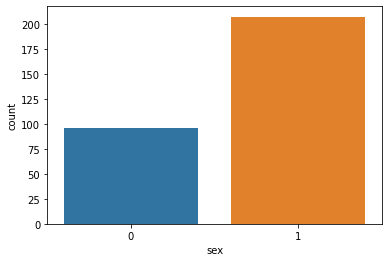

In [27]:
## let's check The person's sex (1 = male, 0 = female) present in the dataset 

sns.countplot(x='sex', data=df_HD)

## Here we find that male is more as compared to  female present in the data set

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FFB6775040>,
      dtype=object)

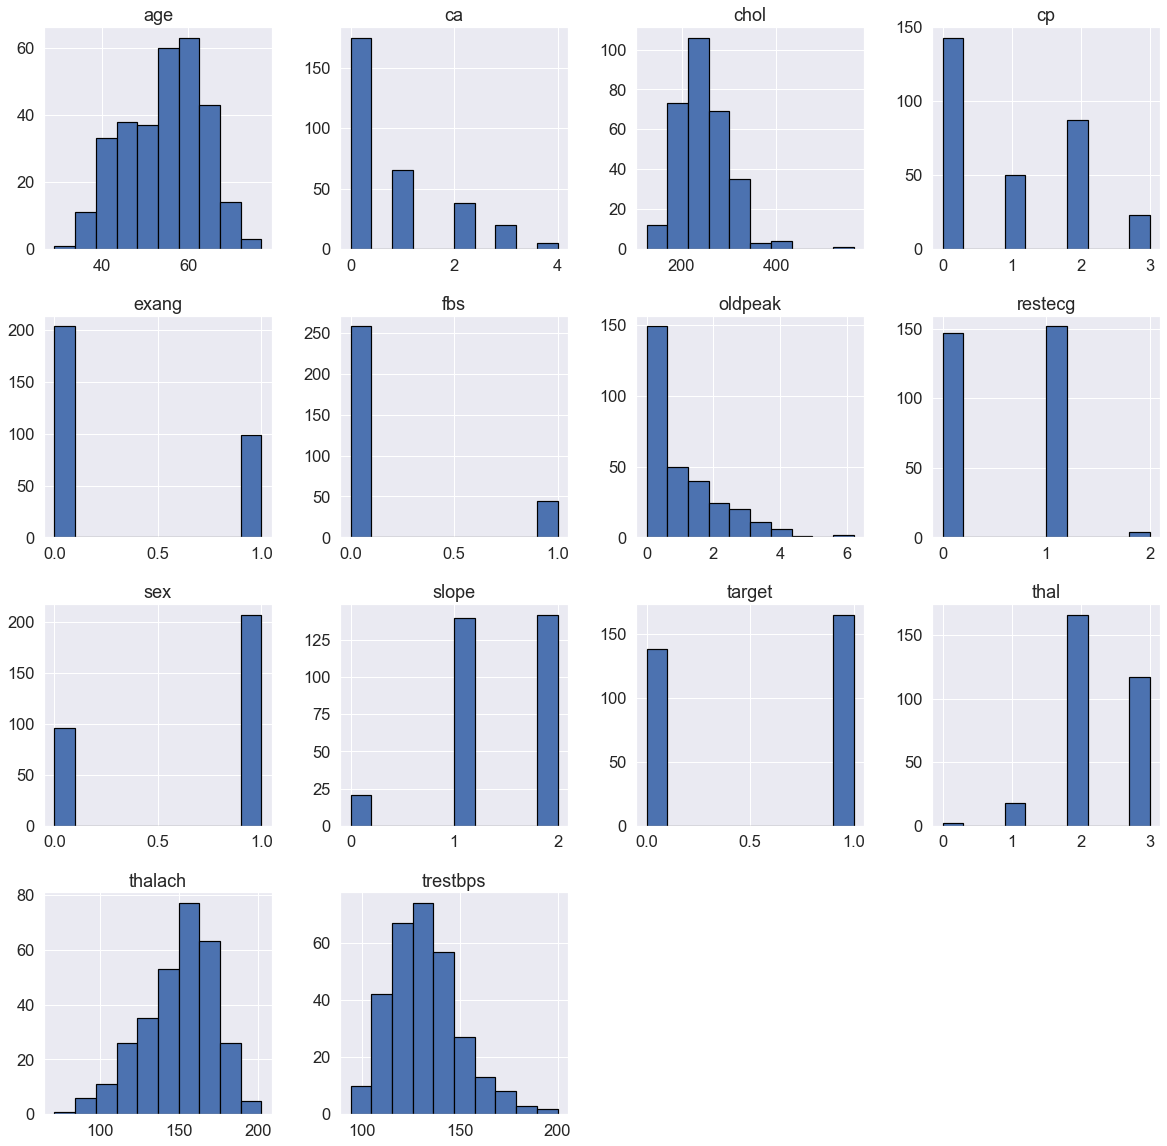

In [28]:
## Now let see various visual representations of the data to understand more about relationship between various feautures.


sns.set(font_scale=1.5)
df_HD.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20))

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


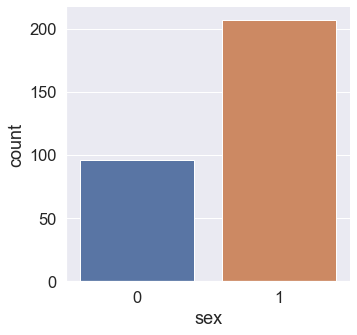

In [30]:

sns.factorplot('sex', data=df_HD, kind='count')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


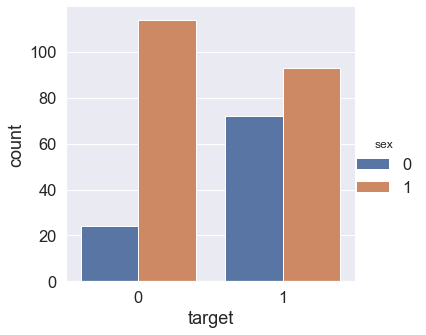

In [31]:
sns.factorplot('target', data=df_HD, hue='sex', kind='count')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


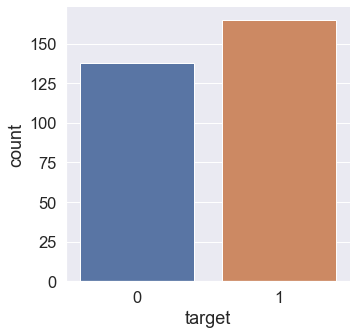

In [33]:
sns.factorplot('target', data=df_HD, kind='count')

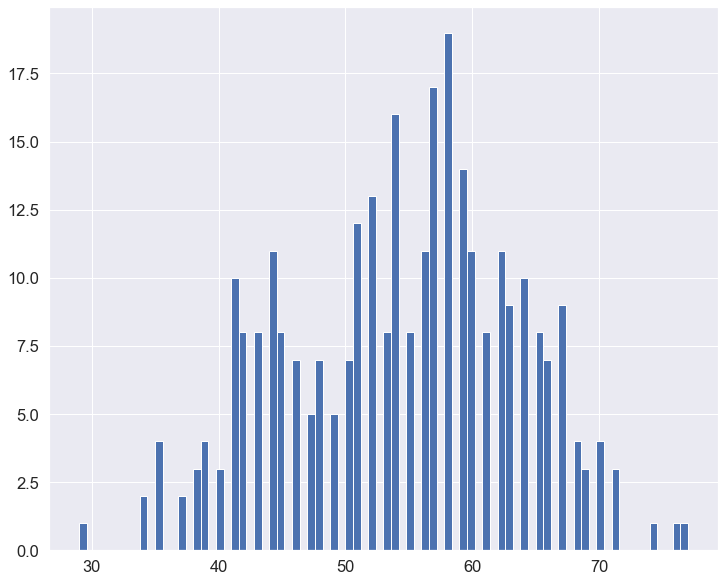

In [34]:
plt.figure(figsize=(12, 10))
df_HD.age.hist(bins=80)

In [36]:
print(f"The most of the patients have a mean age of : {df_HD.age.mean()}")

The most of the patients have a mean age of : 54.366336633663366


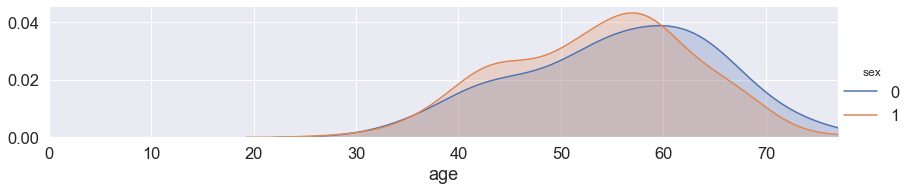

In [38]:
fig = sns.FacetGrid(df_HD, hue="sex", aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = df_HD['age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

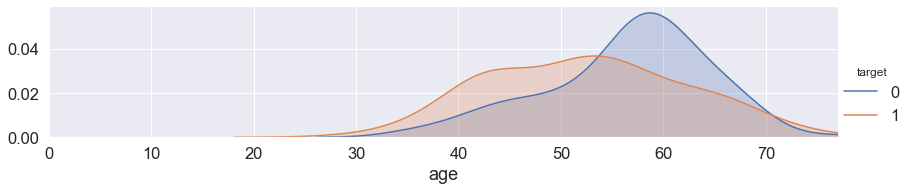

In [39]:

fig = sns.FacetGrid(df_HD, hue="target", aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = df_HD['age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

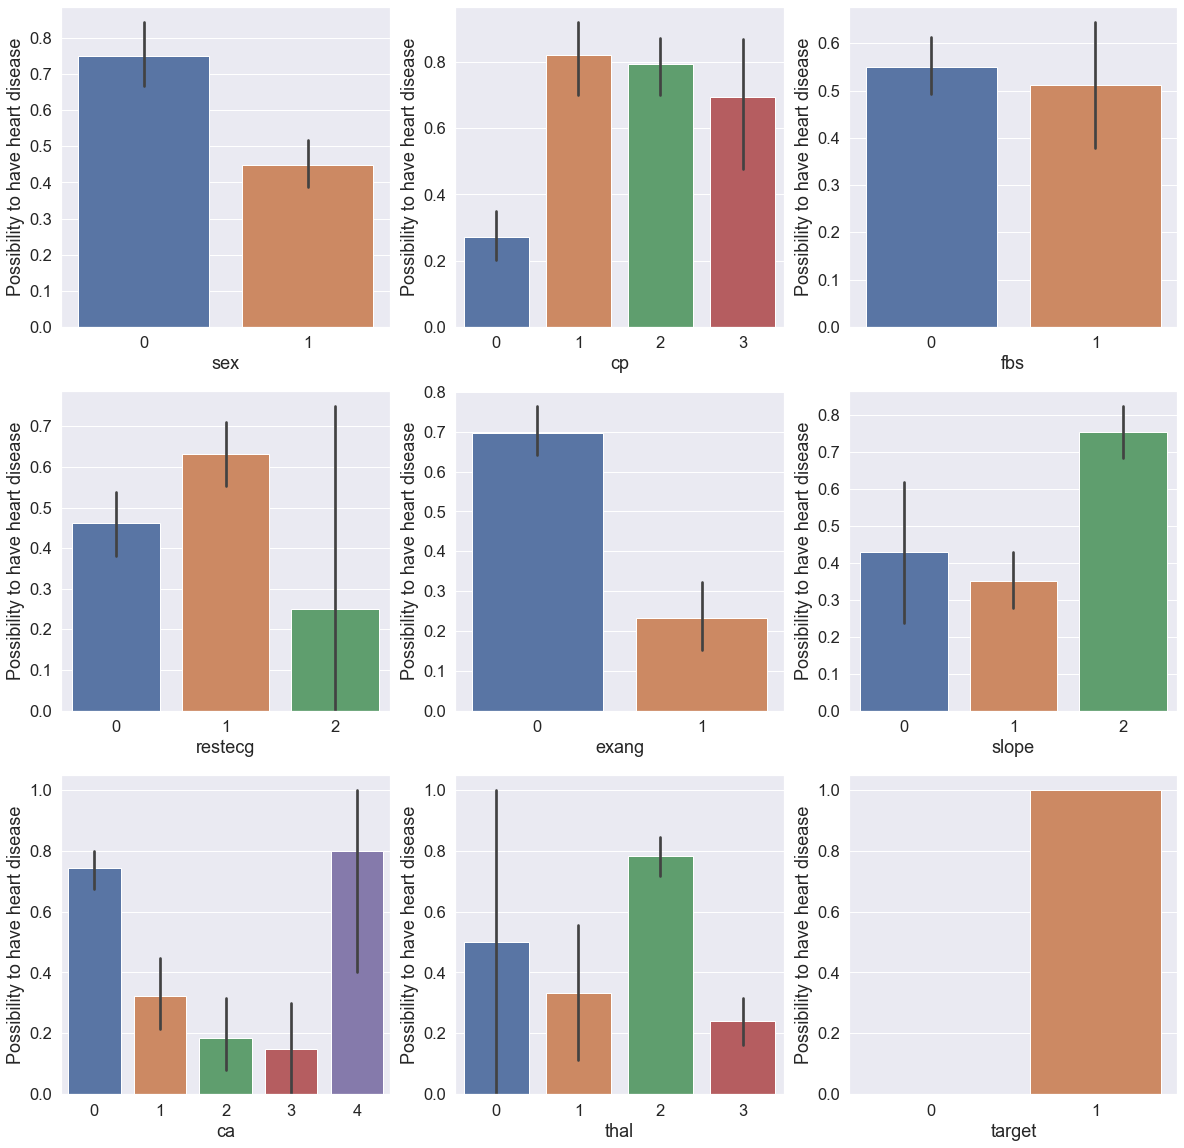

In [47]:

plt.figure(figsize=(20, 20))
for i, column in enumerate(categorical_values, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x=f"{column}", y='target', data=df_HD)
    plt.ylabel('Possibility to have heart disease')
    plt.xlabel(f'{column}')

###  Data Processing

In [48]:
data=pd.get_dummies(df_HD,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])

In [49]:
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [50]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
to_scale=['age','trestbps','chol','thalach','oldpeak']
data[to_scale]=sc.fit_transform(data[to_scale])

In [51]:
X=data.drop(['target'],axis=1)

Y=data['target']


In [54]:
X.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


In [55]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score = 0
for r_state in range (0 , 101):
    x_train,x_test,y_train,y_test = train_test_split(X , Y , random_state = r_state , test_size = 0.20 ) ## split the data set 
    regr = linear_model.LinearRegression() #  use the regression model 
    regr.fit(x_train,y_train) # train and test data set fit in the model 
    y_pred = regr.predict(x_test)
    r2_scr = r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
#The belwo output shows that we are getting acceptable level of r2 score in most of the cases and max value is also shown

r2_score corresponding to random state:  0  is:  0.5210080603101352
r2_score corresponding to random state:  1  is:  0.4315894698181748
r2_score corresponding to random state:  2  is:  0.6657028937102828
r2_score corresponding to random state:  3  is:  0.5799692575409816
r2_score corresponding to random state:  4  is:  0.6112333245650401
r2_score corresponding to random state:  5  is:  0.6113855209203445
r2_score corresponding to random state:  6  is:  0.5399840162666134
r2_score corresponding to random state:  7  is:  0.33640838809023044
r2_score corresponding to random state:  8  is:  0.45948250951582126
r2_score corresponding to random state:  9  is:  0.4466305042647727
r2_score corresponding to random state:  10  is:  0.4731448572797039
r2_score corresponding to random state:  11  is:  0.3399205158269304
r2_score corresponding to random state:  12  is:  0.3609713075960298
r2_score corresponding to random state:  13  is:  0.47927986179117066
r2_score corresponding to random state:  

In [57]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest=tts(X,Y,test_size=0.2,random_state=62)

In [58]:
#Lets do the cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(), X, Y, cv=5,scoring="r2").mean()
#the Below cross validation score is less and it shows that we further need to improve our model using more data

0.07458168239931573

In [60]:
#since maximum is comming around random state 65  will use that to create our final model
x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state =65,test_size=0.20)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

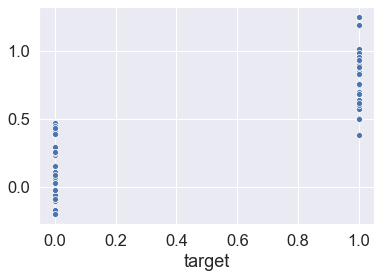

In [61]:
sns.scatterplot(x=y_test , y=y_pred )

In [62]:
#Lets evaluate RMSE and r2 score using sklearn library
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
print("r2 score is: ",r2_score(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is:  0.7374730824278499
RMSE is :  0.2558768954478184


In [63]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(hidden_layer_sizes=(128,128),max_iter=300)
model.fit(xtrain,ytrain)

MLPClassifier(hidden_layer_sizes=(128, 128), max_iter=300)

In [64]:
ypred=model.predict(xtest)

In [65]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(ytest,ypred)
print(acc*100)


80.32786885245902
